# SuperstaQ for QSCOUT

Below is a brief tutorial on SuperstaQ optimizations for QSCOUT. For more information on QSCOUT, visit their website [here](https://www.sandia.gov/quantum/quantum-information-sciences/projects/qscout/). For those who'd like to follow along, try the code out on our [Jupyter Hub](https://tinyurl.com/3mbx2r3v).

## Install SuperstaQ packages
For those who do not have the following installed on their machine, uncomment the below lines and run to install.

In [1]:
! pip install qiskit-superstaq
! pip install typing-extensions
! pip install pylatexenc

  Using cached qiskit_terra-0.20.2-cp39-cp39-macosx_10_9_x86_64.whl (6.2 MB)
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.23.1
    Uninstalling qiskit-terra-0.23.1:
      Successfully uninstalled qiskit-terra-0.23.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
superstaq 0.3.13 requires bqskit~=1.0.3, which is not installed.
superstaq 0.3.13 requires bqskitrs~=0.3.0rc1, which is not installed.
superstaq 0.3.13 requires qsimcirq~=0.14.0, which is not installed.
superstaq 0.3.13 requires secure~=0.3.0, which is not installed.
qiskit-nature 0.5.2 requires qiskit-terra>=0.22.*, but you have qiskit-terra 0.20.2 which is incompatible.
superstaq 0.3.13 requires amazon-braket-ocean-plugin~=1.0.11, but you have amazon-braket-ocean-plugin 1.0.8 which is incompatible.
superstaq 0.3.13 requires amazon-braket-sdk~=1.35.1, but you ha


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


## Imports and Token

In [21]:
import os
import numpy as np
import qiskit as qiskit
import qiskit_superstaq as qss

In [22]:
# token = "YOUR_TOKEN_HERE"
# os.environ["SUPERSTAQ_API_KEY"] = token

## Circuit Compilation

In [4]:
# get provider
provider = qss.SuperstaQProvider()

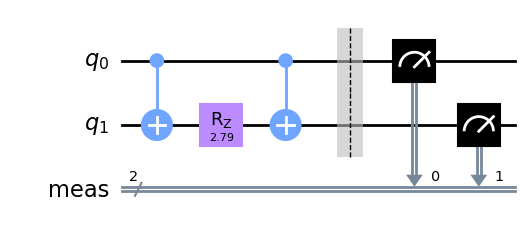

In [5]:
# create circuit
theta = np.random.uniform(0, 4 * np.pi)
circuit1 = qiskit.QuantumCircuit(2)
circuit1.cx(0, 1)
circuit1.rz(theta, 1)
circuit1.cx(0, 1)
circuit1.measure_all()

# draw circuit
circuit1.draw(output="mpl")

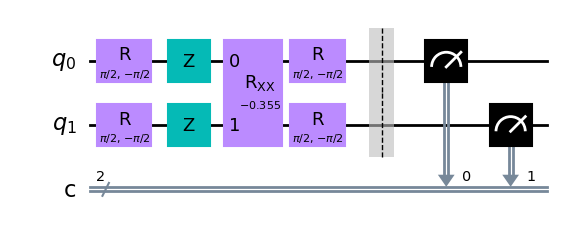

In [6]:
# compile with qscout compile
compiler_output = provider.qscout_compile(circuit1)
compiler_output.circuit.draw("mpl")

In [7]:
# get jaqal program
print(compiler_output.jaqal_program)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] -1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] -3.141592653589793
	Rz allqubits[1] -3.141592653589793
>
MS allqubits[0] allqubits[1] 0 -0.35538099411713064
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] -1.5707963267948966 1.5707963267948966
>
measure_all



## Multiple Circuits

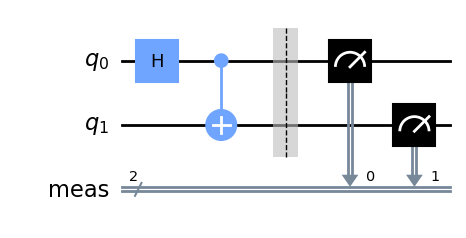

In [8]:
# create second circuit
circuit2 = qiskit.QuantumCircuit(2)
circuit2.h(0)
circuit2.cx(0, 1)
circuit2.measure_all()

# draw second circuit
circuit2.draw("mpl")

In [9]:
# create list of circuits
circuit_list = [circuit1, circuit2]

# compile list of circuits
compiler_output = provider.qscout_compile(circuit_list)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] -1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] -3.141592653589793
	Rz allqubits[1] -3.141592653589793
>
MS allqubits[0] allqubits[1] 0 -0.35538099411713064
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] -1.5707963267948966 1.5707963267948966
>
measure_all



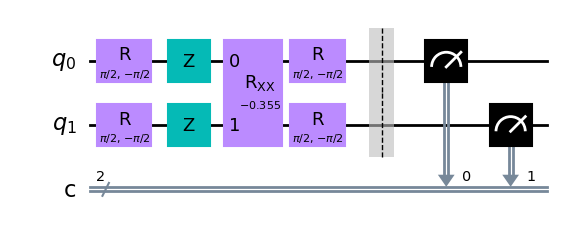

In [10]:
# draw and get jaqal program of first circuit
print(compiler_output.jaqal_programs[0])
compiler_output.circuits[0].draw("mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 3.141592653589793 2.356194490192345
	R allqubits[1] 3.141592653589793 2.356194490192345
>
MS allqubits[0] allqubits[1] 0 -1.5707963267948966
<
	R allqubits[1] 3.141592653589793 2.356194490192345
	R allqubits[0] -1.5707963267948966 1.5707963267948966
>
Rz allqubits[0] 0.7853981633974476
measure_all



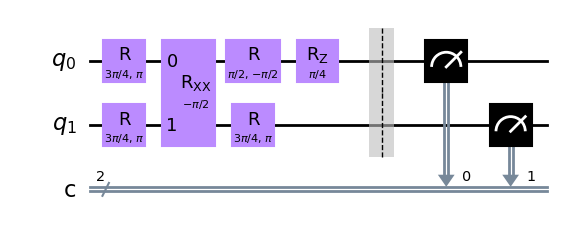

In [11]:
# draw and get jaqal program of second circuit
print(compiler_output.jaqal_programs[1])
compiler_output.circuits[1].draw("mpl")

## Entangling Basis Compilation

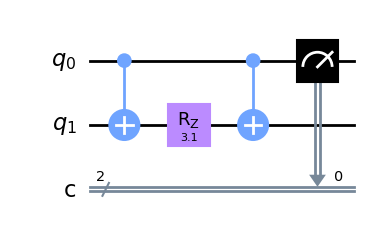

In [12]:
# create circuit
theta = np.random.uniform(0, np.pi)
circuit = qiskit.QuantumCircuit(2, 2)
circuit.cx(0, 1)
circuit.rz(theta, 1)
circuit.cx(0, 1)
circuit.measure(0, 0)

# draw circuit
circuit.draw(output="mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[1] -1.5707963267948966 1.5707963267948966
	R allqubits[0] 0.0 1.5707963267948966
>
Rz allqubits[0] -1.5707963267948966
MS allqubits[0] allqubits[1] 0 -0.046344315369587274
<
	R allqubits[0] 1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] -1.5707963267948966
	Rz allqubits[1] -3.141592653589793
>
measure_all



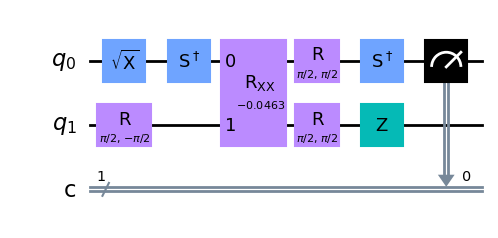

In [13]:
# compile with xx entangling basis
compiler_output = provider.qscout_compile(circuit, base_entangling_gate="xx")

# get jaqal program and draw circuit
print(compiler_output.jaqal_program)
compiler_output.circuit.draw(output="mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[1] 3.141592653589793 3.141592653589793
	R allqubits[0] 0.7853981633974483 3.141592653589793
>
ZZ allqubits[0] allqubits[1] -0.046344315369587274
<
	R allqubits[0] 2.356194490192345 3.141592653589793
	R allqubits[1] -1.5707963267948966 -3.141592653589793
>
measure_all



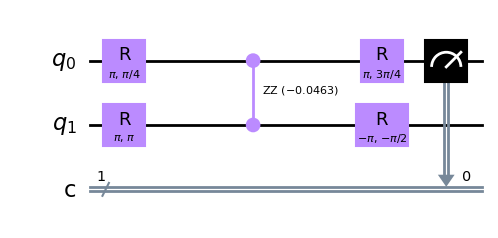

In [14]:
# compile with zz entangling basis
compiler_output = provider.qscout_compile(circuit, base_entangling_gate="zz")

# get jaqal program and draw circuit
print(compiler_output.jaqal_program)
compiler_output.circuit.draw(output="mpl")

## Swap Mirroring

### Create random QV circuit

In [15]:
# get random two-qubit circuit
circ = qiskit.circuit.library.QuantumVolume(2, 1, seed=123)
circ.measure_all()

### Compile without swap mirroring

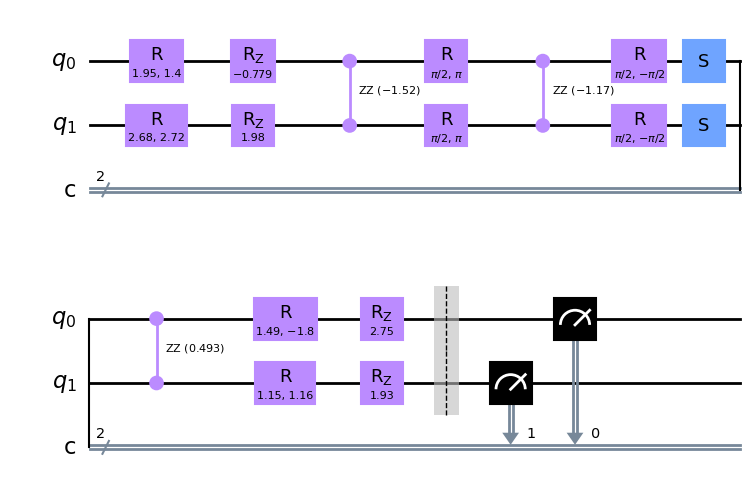

In [16]:
# no swap mirroring compile
circ_nsm = provider.qscout_compile(circ, mirror_swaps=False, base_entangling_gate="zz")

# draw circuit
circ_nsm.circuit.draw("mpl", fold=10)

### Compile with swap mirroring

In [1]:
# swap mirroring compile
circ_nsm = provider.qscout_compile(circ, mirror_swaps=True, base_entangling_gate="zz")

# draw circuit
circ_nsm.circuit.draw("mpl", fold=10)

NameError: name 'provider' is not defined

## Simulator

In [18]:
superstaq = qss.superstaq_provider.SuperstaQProvider()
backend = superstaq.get_backend("sandia_qscout_qpu")
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
job = backend.run(qc, shots=100, method="dry-run")
print(job.result().get_counts())

{'00': 46, '11': 54}
